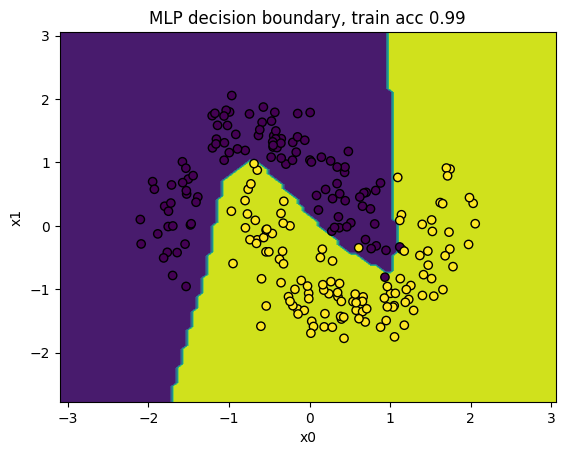

In [19]:
# Decision boundary example for sklearn MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data
X, y = make_moons(n_samples=300, noise=0.20, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Model
clf = MLPClassifier(hidden_layer_sizes=(50,30), activation='relu',
                    solver='adam', max_iter=2000, random_state=1)
clf.fit(X_train_s, y_train)

# Decision boundary using DecisionBoundaryDisplay (sklearn >= 1.1)
disp = DecisionBoundaryDisplay.from_estimator(clf, X_train_s, response_method="predict",
                                              xlabel='x0', ylabel='x1', plot_method='contourf')
plt.scatter(X_train_s[:,0], X_train_s[:,1], c=y_train, edgecolor='k')
plt.title(f"MLP decision boundary, train acc {clf.score(X_train_s, y_train):.2f}")
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


ValueError: Image data must be a sequence of ndimages.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


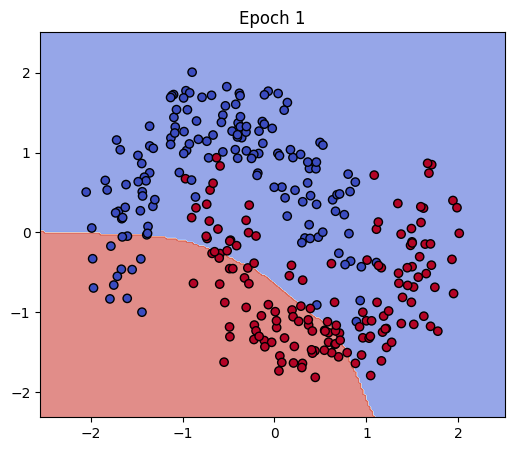

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# 1. Generate toy 2D data
X, y = make_moons(n_samples=300, noise=0.20, random_state=2)

# 2. Scale features
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# 3. Define classifier with warm_start=True so we can step through epochs
clf = MLPClassifier(hidden_layer_sizes=(50,30),
                    activation='relu',
                    solver='sgd',
                    learning_rate_init=0.01,
                    momentum=0.9,
                    max_iter=1,            # we’ll manually loop epochs
                    warm_start=True,
                    random_state=1)

# 4. Prepare mesh grid for plotting decision boundary
xx = np.linspace(X_s[:,0].min()-0.5, X_s[:,0].max()+0.5, 200)
yy = np.linspace(X_s[:,1].min()-0.5, X_s[:,1].max()+0.5, 200)
xxg, yyg = np.meshgrid(xx, yy)
grid = np.c_[xxg.ravel(), yyg.ravel()]

fig, ax = plt.subplots(figsize=(6,5))

# 5. Animation function
def update(frame):
    ax.clear()
    # Train one epoch
    clf.fit(X_s, y)
    # Predict on grid
    Z = clf.predict(grid)
    Z = Z.reshape(xxg.shape)
    # Plot
    ax.contourf(xxg, yyg, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    ax.scatter(X_s[:,0], X_s[:,1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(f"Epoch {frame+1}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# 6. Create animation of e.g. 50 epochs
anim = animation.FuncAnimation(fig, update, frames=50, interval=300)

# 7. To save as MP4 (requires ffmpeg) or to display inline in notebook
anim.save('mlp_boundary_evolution.mp4', writer='ffmpeg')
plt.show()


---

In [ ]:
!pip install imageio[ffmpeg]

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap
import imageio

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # only 2D for visualization
y = iris.target

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Classifier
clf = SGDClassifier(loss="log_loss", max_iter=1, warm_start=True, eta0=0.05, learning_rate='constant', random_state=0)

# Mesh grid
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Colormaps
cm = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cm_bright = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])

# Prepare figure
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlabel("Feature 1 (standardized)")
ax.set_ylabel("Feature 2 (standardized)")

# Store frames as images
frames = []

for epoch in range(150):
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.clear()
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=cm)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
    ax.set_title(f"Epoch {epoch+1}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    # Save current frame to a numpy array
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)

plt.close(fig)

# Save frames as MP4 using imageio
imageio.mimsave("iris_decision_boundary.mp4", frames, fps=5)
# Or save as GIF
imageio.mimsave("iris_decision_boundary.gif", frames, fps=5)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_16732\4071052705.py:54: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_16732\4071052705.py:54: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import imageio

# Load Iris dataset (use first two features for 2D visualization)
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10),
                    activation='relu',
                    solver='sgd',
                    learning_rate_init=0.05,
                    max_iter=1,        # train 1 epoch per loop
                    warm_start=True,   # continue training each iteration
                    random_state=0)

# Create mesh grid for plotting decision boundaries
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Colormaps for 3 classes
cm = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cm_bright = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])

# Prepare figure
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlabel("Feature 1 (standardized)")
ax.set_ylabel("Feature 2 (standardized)")

frames = []

# Train for multiple epochs and capture frames
for epoch in range(50):
    clf.fit(X, y)
    
    # Predict on mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.clear()
    # Decision boundary
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=cm)
    # Plot points
    for i, color, label in zip(range(3), ['#FF0000','#00AA00','#0000FF'], class_names):
        ax.scatter(X[y==i,0], X[y==i,1], c=color, label=label, edgecolors='k')
    
    ax.set_title(f"MLP Decision Boundary - Epoch {epoch+1}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc='upper right')
    
    # Capture frame as image
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)

plt.close(fig)

# Save as MP4
imageio.mimsave("iris_mlp_decision_boundary.mp4", frames, fps=5)
# Or as GIF
# imageio.mimsave("iris_mlp_decision_boundary.gif", frames, fps=5)

print("Animation saved as iris_mlp_decision_boundary.mp4")


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_16732\1848781378.py:68: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_16732\1848781378.py:68: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba inste

Animation saved as iris_mlp_decision_boundary.mp4
